In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import matplotlib
#Customize background and pallete colors 
sns.set_style("darkgrid")
#ncol = len(phy_norm.T.columns)
from matplotlib import cm
ncol=21
values = np.linspace(0,1, ncol)
#colors_ = cm.Paired(values)
colors_=cm.tab20(values)

Due to we have curated manually the sulfur cycle, we known which Pfams are involved in certain metabolic Pathways.
Therefore we have generated a file containing the PFAMS and the corresponding KO numbers and the name of the pathway involved, see the [tabular file](https://github.com/eead-csic-compbio/metagenome_Pfam_score/blob/master/Advanced_mode/input_sulfur_data/sulfur_score_kegg_list) provide in [MEBS sofware](https://eead-csic-compbio.github.io/metagenome_Pfam_score/)

# Added -comp option in MEBS
(april 30 2018) 

```bash

perl mebsv1.pl -input test_metagenomes/ -type genomic -comp > test_metagenomes.comp.tsv 

```

Have a look of the file generated with the above command 

In [8]:
test_met=pd.read_table( "../data/test_metagenomes.comp.tsv", index_col=0) 
test_met.head()

,sulfur,carbon,oxygen,iron,nitrogen,sulfur_<comp>,sulfur_1,sulfur_2,sulfur_3,sulfur_4,...,sulfur_20,sulfur_21,sulfur_22,sulfur_23,sulfur_24,sulfur_25,sulfur_26,sulfur_27,sulfur_28,sulfur_29
4511045.3_metagenome.faa,-2.295,1.790,5.412,2.745,13.024,63.3,44.4,20.0,100.0,29.4,...,28.6,0.0,57.1,81.8,100.0,100.0,100.0,100.0,75.0,25.0
4440966.3_metagenome.faa,5.817*,8.804,1.178,4.579,11.697,69.1,55.6,40.0,100.0,52.9,...,28.6,0.0,42.9,72.7,100.0,100.0,100.0,100.0,100.0,66.7


In [9]:
sulfur_paths=pd.read_table("../data/sulfur_completeness.ids",index_col=0,sep="\t")
sulfur_paths.T

id,sulfur_1,sulfur_2,sulfur_3,sulfur_4,sulfur_5,sulfur_6,sulfur_7,sulfur_8,sulfur_9,sulfur_10,...,sulfur_19,sulfur_20,sulfur_21,sulfur_22,sulfur_23,sulfur_24,sulfur_25,sulfur_27,sulfur_28,sulfur_29
Path_description,Sulfite oxidation,Thiosulfate oxidation,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Carbon disulfide oxidation,Alkanesulfonate degradation,Sulfate reduction Assimilative,...,Suloacetaldehyde oxidation,Elemental sulfur oxidation,Elemental sulfur disproportion,Methanesulfonate oxidation,Taurine oxidation,DMS methanogenesis,MTP methanogesis,tMethanethiol methanogenesis,SQDG biosynthesis,Marker genes


Parse file according to the desired pathways to plot

In [10]:
concat=pd.concat([sulfur_paths.T, test_met],axis=0)
concat

,carbon,iron,nitrogen,oxygen,sulfur,sulfur_1,sulfur_10,sulfur_11,sulfur_12,sulfur_13,...,sulfur_28,sulfur_29,sulfur_3,sulfur_4,sulfur_5,sulfur_6,sulfur_7,sulfur_8,sulfur_9,sulfur_<comp>
Path_description,NaN,NaN,NaN,NaN,NaN,Sulfite oxidation,Sulfate reduction Assimilative,Sulfide oxidation,Cysteate oxidation,Dimethylsulfone oxidation,...,SQDG biosynthesis,Marker genes,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Carbon disulfide oxidation,Alkanesulfonate degradation,NaN
4511045.3_metagenome.faa,1.790,2.745,13.024,5.412,-2.295,44.4,50,24.1,100,66.7,...,75,25,100,29.4,25,25,33.3,100,100,63.3
4440966.3_metagenome.faa,8.804,4.579,11.697,1.178,5.817*,55.6,45,34.5,100,100,...,100,66.7,100,52.9,50,45,77.8,0,100,69.1


In [15]:
concat.columns = concat.iloc[0]
concat.drop('Path_description' )


Path_description,nan,nan,nan,nan,nan,Sulfite oxidation,Sulfate reduction Assimilative,Sulfide oxidation,Cysteate oxidation,Dimethylsulfone oxidation,...,SQDG biosynthesis,Marker genes,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Carbon disulfide oxidation,Alkanesulfonate degradation,nan
4511045.3_metagenome.faa,1.790,2.745,13.024,5.412,-2.295,44.4,50,24.1,100,66.7,...,75,25,100,29.4,25,25,33.3,100,100,63.3
4440966.3_metagenome.faa,8.804,4.579,11.697,1.178,5.817*,55.6,45,34.5,100,100,...,100,66.7,100,52.9,50,45,77.8,0,100,69.1


# Microbial mat sulfur completeness

In [21]:
comp=pd.read_table("../data/completeness.parse.tab",index_col=0)
comp.head()

,Sulfite oxidation,Thiosulfate oxidation,Tetrathionate oxidation,Tetrathionate reduction,Sulfate reduction DS,Elemental sulfur reduction,Thiosulfate disproportion,Alkanesulfonate degradation,Sulfate reduction Assimilative,Sulfide oxidation,...,Sulfolactate oxidation,DMS oxidation,DMSP oxidation,MTP oxidation,Suloacetaldehyde oxidation,Elemental sulfur oxidation,Elemental sulfur disproportion,Methanesulfonate oxidation,Taurine oxidation,Marker genes
s01_ANOV12,100,70,100,76.5,75,60,77.8,100,65,72.4,...,71.4,62.5,100.0,100,85.7,71.4,0,85.7,81.8,100.0
s02_BNOV12,100,70,100,76.5,75,60,77.8,100,65,69.0,...,71.4,68.8,100.0,100,85.7,57.1,0,85.7,81.8,100.0
s03_CNOV12,100,80,100,76.5,75,60,77.8,100,65,75.9,...,71.4,81.2,100.0,100,85.7,71.4,100,85.7,81.8,100.0
s04_AMAY13,100,70,100,76.5,75,60,77.8,100,65,69.0,...,71.4,81.2,100.0,100,85.7,57.1,0,85.7,81.8,100.0
s05_BMAY13,100,80,100,76.5,75,60,77.8,100,70,69.0,...,71.4,81.2,100.0,100,85.7,71.4,100,85.7,81.8,100.0


In [22]:
comp=comp.T
#To plot in time order for each site 
sorted_columns = ["s01_ANOV12", "s04_AMAY13", "s07_AOCT13", "s10_AMAY14",
                 "s02_BNOV12", "s05_BMAY13", "s08_BOCT13", "s11_BMAY14",
                 "s03_CNOV12", "s06_CMAY13", "s09_COCT13", "s12_CMAY14"]

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


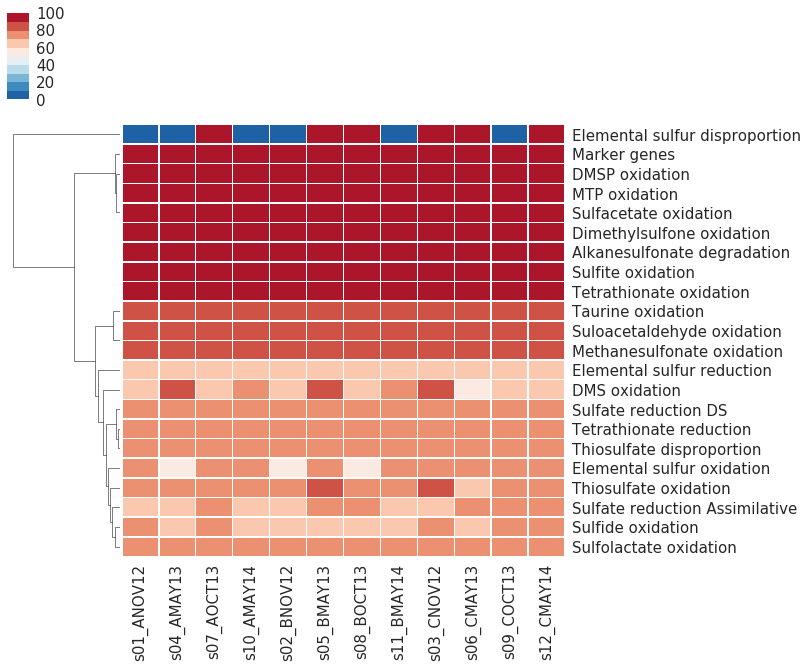

In [27]:
#First completeness figure
sns.set(font_scale=1.5)
axs = sns.clustermap(comp[sorted_columns], col_cluster=False, linewidths=0.6,cmap=sns.color_palette("RdBu_r", 10))
plt.tight_layout()
plt.savefig("../figures/allS_paths_comp.png", bbox_inches='tight', dpi=600)


# Plot only pathways with change

In [24]:
sulfurcomp=comp[sorted_columns]
sulfurcomp.T.columns

Index(['Sulfite oxidation', 'Thiosulfate oxidation', 'Tetrathionate oxidation',
       'Tetrathionate reduction', 'Sulfate reduction DS',
       'Elemental sulfur reduction', 'Thiosulfate disproportion',
       'Alkanesulfonate degradation', 'Sulfate reduction Assimilative',
       'Sulfide oxidation', 'Dimethylsulfone oxidation',
       'Sulfacetate oxidation', 'Sulfolactate oxidation', 'DMS oxidation',
       'DMSP oxidation', 'MTP oxidation', 'Suloacetaldehyde oxidation',
       'Elemental sulfur oxidation', 'Elemental sulfur disproportion',
       'Methanesulfonate oxidation', 'Taurine oxidation', 'Marker genes'],
      dtype='object')

In [25]:
sulfurplot=sulfurcomp.T[['Sulfide oxidation','Sulfate reduction Assimilative','Thiosulfate oxidation',
             'Elemental sulfur oxidation','DMS oxidation']]

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


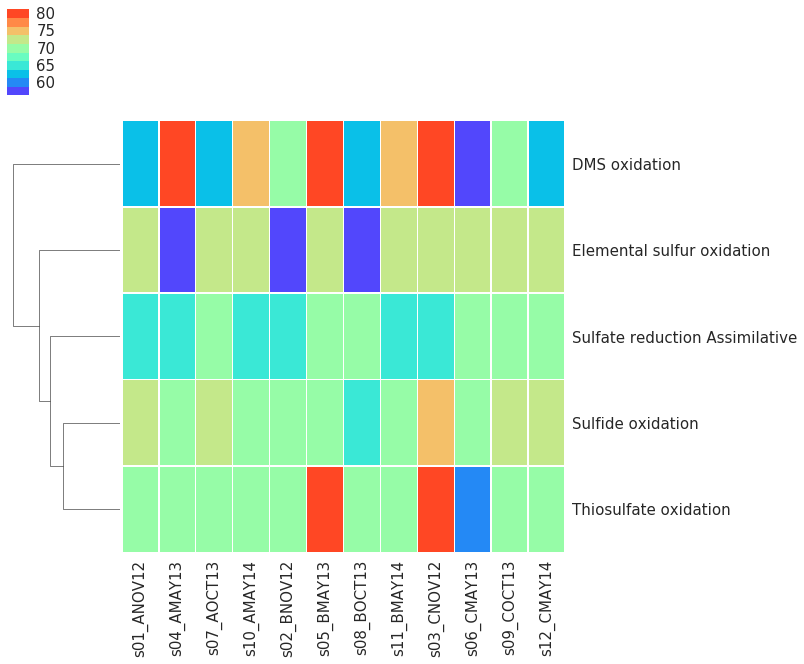

In [40]:
sns.set(font_scale=1.5)
axs = sns.clustermap(sulfurplot.T, col_cluster=False, linewidths=0.6,cmap=sns.color_palette("rainbow", 10))
plt.tight_layout()
plt.savefig("../figures/sulfur.completeness.png", bbox_inches='tight', dpi=600 )

# Methane completeness



In [30]:
methane_comp=pd.read_table("../data/methane.completeness", index_col=0)
methane_comp.head()

,sulfur,carbon,oxygen,iron,nitrogen,carbon_<comp>,carbon_1,carbon_2,carbon_3,carbon_4,carbon_5,carbon_6,carbon_7,carbon_8,carbon_9,carbon_10,carbon_12,carbon_13
S9,8.714,35.156,6.853,9.391,19.180,84.8,100,70,100,76.5,75,60,77.8,100,100,70,72.4,100
S8,8.535,42.132,6.839,9.391,19.226,87.6,100,70,100,76.5,75,60,77.8,100,100,70,65.5,100
S6,8.262,33.394,6.839,9.391,18.785,87.3,100,60,100,76.5,75,60,77.8,100,100,70,69.0,100
S3,9.085,29.336,6.839,9.391,19.048,89.2,100,80,100,76.5,75,60,77.8,100,100,65,75.9,100
S7,8.901,42.838,6.839,9.391,19.226,88.3,100,70,100,76.5,75,60,77.8,100,100,70,72.4,100


```{bash}
Names of pathways
1	coenzyme B/coenzyme M regeneration I (methanophenazine-dependent)
2	Methane oxidation, methanotroph, methane => formaldehyde(M00174)
3	methanogenesis energy conservation 
4	methanogenesis from acetate (M00357) 34 KOS
5	methanogenesis from methylamines (M00563)
6	methanogenesis from DMS, methylthiopropanoate, methanethiol 
7	methanogenesis from H2 and CO2 (M00567) 
8	methanogenesis from acetate reductive acetyl coenzyme A pathway II (autotrophic methanogens)
9	methanogenesis from methanol (M00356) 
10	methylamine degradation (I,II) 
12	methyl-coenzyme M oxidation to CO2
13	methyl-coenzyme M reduction to methane
```

In [31]:
methane_comp=methane_comp.T

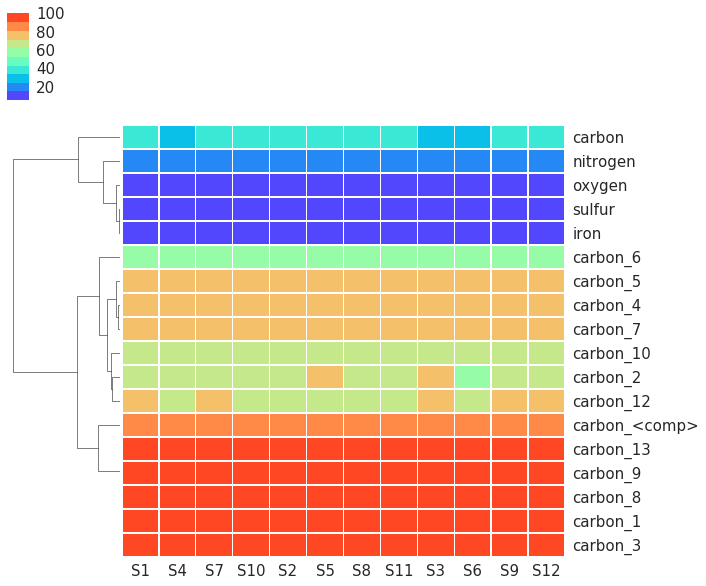

In [32]:
methane_comp_sort = ["S1", "S4", "S7", "S10",
                 "S2", "S5", "S8", "S11",
                 "S3", "S6", "S9", "S12"]
axs = sns.clustermap(methane_comp[methane_comp_sort], col_cluster=False, linewidths=0.6,cmap=sns.color_palette("rainbow", 10))

The only observed differences are in pathways 10,2, 12
derefore we plot onlythose 


In [33]:
methane_comp=methane_comp.T

In [34]:
methane_comp=methane_comp[['carbon_2', 'carbon_10', 'carbon_12']]
methane_comp=methane_comp.T

In [35]:
methane_comp_sort = ["S1", "S4", "S7", "S10",
                 "S2", "S5", "S8", "S11",
                 "S3", "S6", "S9", "S12"]

In [36]:
plotmet=methane_comp[methane_comp_sort]
plotmet

,S1,S4,S7,S10,S2,S5,S8,S11,S3,S6,S9,S12
carbon_2,70.0,70.0,70.0,70.0,70.0,80.0,70.0,70.0,80.0,60.0,70.0,70.0
carbon_10,65.0,65.0,70.0,65.0,65.0,70.0,70.0,65.0,65.0,70.0,70.0,70.0
carbon_12,72.4,69.0,72.4,69.0,69.0,69.0,65.5,69.0,75.9,69.0,72.4,72.4


In [37]:
plotmet=plotmet.T
plotmet.columns = ['Methane oxidation','Methylamine degradation','Methyl-coenzyme M oxidation to CO2']


/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.2+4432.g411fbf6-py3.5-linux-x86_64.egg/matplotlib/figure.py:1988: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


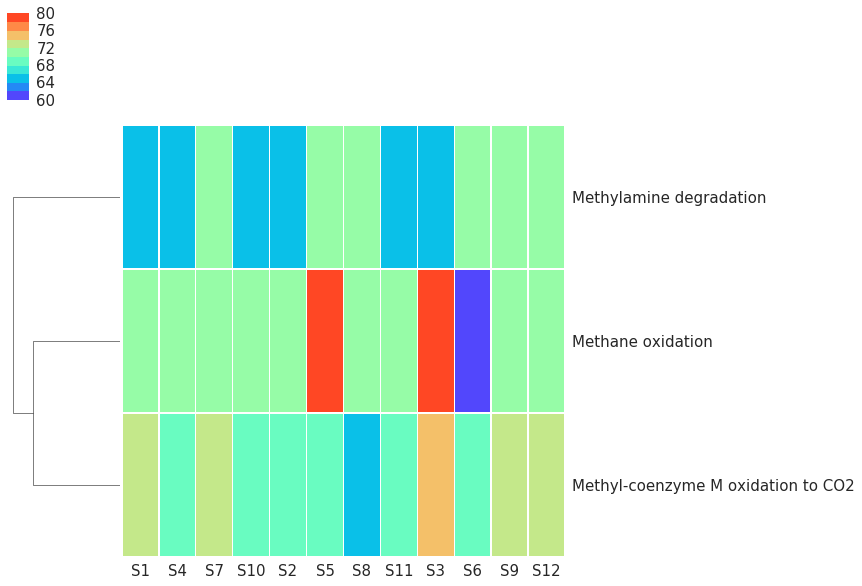

In [41]:
sns.set(font_scale=1.5)
axs = sns.clustermap(plotmet.T, col_cluster=False, linewidths=0.6,cmap=sns.color_palette("rainbow", 10))
plt.tight_layout()
plt.savefig("../figures/methane.completeness.png", bbox_inches='tight', dpi=600 )